# Global stability dynamics and sensitivity assessment of COVID-19 with timely-delayed diagnosis in Ghana

Consider the following system of differential equation for the VSSqEI1I2HRVs model with 9 compartments:

dV/dt = aS - muV - bV

dS/dt = wedge + bV − lamdaS + q1Sq − (mu + q)S + cR

dSq/dt = qS − q1Sq − muSq

dE/dt = lamdaS − omegaE − muE

dI1/dt = phi omega E − gamma1I1 − muI1 − dI1

dI2/dt = (1 − phi) omegaE − gamma2I2 − muI2 − dI2

dH/dt = gamma1I1 + gamma2I2 − mH − muH − dH

dR/dt = mH − muR - cR

dVs/dt = f1E + f2I1 + f3I2 − dvVs

where;






| Compartment | Meaning |
|------|-----|
| V | Vaccinated class  |
| S | susceptible  |
|Sq  | self-quarantine susceptible  |
| E | exposed  |
| I1 | infectious with timely diagnosis |
| I2 | infectious with delayed diagnosis |
| H | Hospitalized |
| Vs | The viral spread in the environment |
| R | recovered |
| N | Total human population |

At time t we have
N(t) = V(t)+S(t)+Sq(t)+E(t)+I1(t)+I2(t)+H(t)+R(t)+Vs(t)


The parameters as used in the model include

|Parameter | Meaning
|------|-----|
lamda | beta_eE + beta_i1I1 + beta_i2I2 + beta_vVs
a | Vacination rate. Percentage of the susceptible class that got vaccinated
b | percentage of the vaccinated class that lost their vaccination
c | percentage o succeptible class who become susceptible to the virus after time t
wedge | Recruitment rate
q | Self-quarantined rate of the susceptible
q1 | Transition rate of self-quarantined individuals to the susceptible
βe | Transmission rate from the exposed to the susceptible
βi1 | Transmission rate from the infectious with timely diagnosis to the susceptible
βi2 | Transmission rate from the infectious with delayed diagnosis to the susceptible
βv | Transmission rate from the susceptible to the exposed (infected by virus)
1/omega | Incubation period
phi | Proportion of the infectious with timely diagnosis
1/gamma1 | Waiting time of the infectious for timely diagnosis
1/gamma2 | Waiting time of the infectious for delayed diagnosis
mu | Natural human death rate
d | Disease-induced death rate
m | Recovery rate of the hospitalized
f1 | Virus released rate of the exposed
f2 | Virus released rate of the infectious with timely-diagnosis
f3 | Virus released rate of the infectious with delayed-diagnosis
dv | Decay rate of virus in the environment


### Import libraries for generating & visualizing the data

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patheffects as path_effects
from matplotlib import dates as mdates
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# #date = data['t'].values
# total_recovered = data['recovered'].values
# total_vaccinations = data['vaccinated'].values
# total_hospitalized = data['Hospitalized'].values
# #total_timely_inf = data['Infectious Timely Diagnosis'].values
# #total_delayed_inf = data['Infectious Delayed Diagnosis'].values


In [4]:
# def odes(x,a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3,ct):
#     # Calculated Parameters
#     # Assign each function to a vector element
#     V = x[0]
#     S = x[1]
#     Sq = x[2]
#     E = x[3]
#     I1 = x[4]
#     I2 = x[5]
#     H = x[6]
#     R = x[7]
#     Vs = x[8]

#     # Define N(t)
#     N = V + S + Sq + E + I1 + I2 + H + R + Vs
#     #Let
#     lamda = beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*Vs

#     dVdt = a*S - mu*V - b*V
#     dSdt = wedge + b*V - lamda*S + q1*Sq - (mu + q)*S + c*R
#     dSqdt = q*S - q1*Sq - mu*Sq
#     dEdt = lamda*S - omega*E -mu*E
#     dI1dt = phi*omega*E - gamma_1*I1 - mu*I1 - d*I1
#     dI2dt = (1-phi)*omega*E - gamma_2*I2 - mu*I2 - d*I2
#     dHdt = gamma_1 * I1 + gamma_2*I2 - m*H - mu*H - d*H
#     dRdt = m*H - mu*R - c*R
#     dVsdt = f1*E + f2*I1 + f3*I2 - dv*Vs

#     return [dVdt, dSdt, dSqdt, dEdt, dI1dt, dI2dt, dHdt, dRdt, dVsdt]

# #parameters from literature
# a=22384226/30417856 #Total vaccinated out of total population
# b=0.32
# c=0.936
# wedge=1319.294
# q=0.0333
# q1=1.6945e-5
# beta_e=6.0380e-8
# beta_i1=3.8196e-8
# beta_i2=1.4286e-5
# phi=0.9000
# gamma_1=0.5000
# gamma_2=0.0714
# d=0.006139
# f1=0.0178
# f2=0.3115
# f3=4.6131e-5
# m=0.9815
# beta_v=4.00199e-8
# omega=1/5.2
# mu=4.2578e-5
# dv=0.3117

# S0 = 30417848 #everyone starts out as susceptible, except for initial exposed, infected and hospitalized
# V0 = 0
# Sq0 = 0
# E0 = 2
# I10 = 2
# I20 = 2
# H0 = 2
# R0 = 0
# Vs0 = 0
# x0 = [V0,S0,Sq0,E0,I10,I20,H0,R0,Vs0]

# # A grid of time points (in days)
# t = np.linspace(0, 200, 1000) #from day 0 to day 100, generate 1000 points




In [5]:
# #ODE system model fitting
# def ModelSolver(t,a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3, InitialConditions):

#     ca=a
#     cb=b
#     cc=c
#     cwedge=wedge
#     cq=q
#     cq1=q1
#     cbeta_e=beta_e
#     cbeta_i1=beta_i1
#     cbeta_i2=beta_i2
#     cphi=phi
#     cgamma_1=gamma_1
#     cgamma_2=gamma_2
#     cd=d
#     cf1=f1
#     cf2=f2
#     cf3=f3
#     cm=m
#     cbeta_v=beta_v
#     comega=omega
#     cmu=mu
#     cdv=dv

#     ct = t
#     cInit=InitialConditions

#     def LocalModel(cInit, ct):
#         x0 = cInit
#         t = ct

#         return odes(x0, ca,cb,cc,cwedge,cq,cq1,cmu,comega,cbeta_e,cbeta_i1,cbeta_i2,cbeta_v,cphi,cgamma_1,cgamma_2,cdv,cm,cd,cf1,cf2,cf3, t)

#     Solution=odeint(LocalModel,cInit,t)
#     #sol = Solution[:,3] + Solution[:, 4]
#     sol = Solution[:,1]
#     return sol

In [6]:
# def ModelFit(t,a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3):
#     ca=a
#     cb=b
#     cc=c
#     cwedge=wedge
#     cq=q
#     cq1=q1
#     cbeta_e=beta_e
#     cbeta_i1=beta_i1
#     cbeta_i2=beta_i2
#     cphi=phi
#     cgamma_1=gamma_1
#     cgamma_2=gamma_2
#     cd=d
#     cf1=f1
#     cf2=f2
#     cf3=f3
#     cm=m
#     cbeta_v=beta_v
#     comega=omega
#     cmu=mu
#     cdv=dv
#     ct = t

#     return ModelSolver(ct,ca,cb,cc,cwedge,cq,cq1,cmu,comega,cbeta_e,cbeta_i1,cbeta_i2,cbeta_v,cphi,cgamma_1,cgamma_2,cdv,cm,cd,cf1,cf2,cf3, x0)

In [7]:
# # Performance measurement
# #Measures the squared error between the data and the fit given an initial parameter guess
# def SquaredError(InitialParameterGuess):

#     try:
#         #Some guesses will result in an error or an invalid integration
#         #this ensures that the error is estimated only for valid solutions
#         cModelParams=curve_fit(ModelFit, t,total_vaccinations, method ='lm',p0=InitialParameterGuess)
#         cSolution=ModelSolver(t,cModelParams[0][0],cModelParams[0][1],cModelParams[0][2],cModelParams[0][3],cModelParams[0][4],cModelParams[0][5],cModelParams[0][6],cModelParams[0][7],cModelParams[0][8],cModelParams[0][9],cModelParams[0][10],cModelParams[0][11],cModelParams[0][12],
#                               cModelParams[0][13],cModelParams[0][14],cModelParams[0][15],cModelParams[0][16],cModelParams[0][17],cModelParams[0][18],cModelParams[0][19],cModelParams[0][20],x0)

#         error=[(val-sal)**2 for val,sal in zip(cSolution, total_vaccinations)]

#     except RuntimeError:

#         #Based on the scale of the data the following list of values will be large enough to be rejected as a solution
#         error=[10,10]

#     return sum(error)

In [8]:
# #  Random Search of initial values
# #Random selection of the initial guess values
# def RandomSearch(Iterations):

#     nIt=Iterations
#     GuessContainer=[]
#     ErrorContainer=[]

#     for k in range(nIt):

#         lGuess=[np.random.uniform(low=0,high=1) for val in range(21)]
#         lerror=SquaredError(lGuess)

#         GuessContainer.append(lGuess) #Contains the list of random initial values
#         ErrorContainer.append(lerror) #List of the errors

#     minError=np.min(ErrorContainer) #Min error value
#     minLocation=[j for j in range(nIt) if ErrorContainer[j]==minError] #Returns the location of the min value in the list

#     bestGuess=GuessContainer[minLocation[0]] #Best initial value guess

#     return ErrorContainer,bestGuess

# errs,bG=RandomSearch(5)


In [9]:
# # Initial values Random Search Fitting
# #ModelParams02=curve_fit(ModelFit,t,total_cases,p0=bG,bounds=(0, 50))
# ModelParams03=curve_fit(ModelFit,t,total_vaccinations,p0=bG,bounds=(0, 15))
# #FitSolution2=ModelSolver(t,ModelParams02[0][0],ModelParams02[0][1],ModelParams02[0][2],ModelParams02[0][3],ModelParams02[0][4],ModelParams02[0][5],ModelParams02[0][6],ModelParams02[0][7],ModelParams02[0][8],ModelParams02[0][9],ModelParams02[0][10],ModelParams02[0][11],ModelParams02[0][12],ModelParams02[0][13],ModelParams02[0][14],ModelParams02[0][15],x0)
# FitSolution3 = ModelSolver(t, ModelParams03[0][0],ModelParams03[0][1],ModelParams03[0][2],ModelParams03[0][3],ModelParams03[0][4],ModelParams03[0][5],ModelParams03[0][6],ModelParams03[0][7],ModelParams03[0][8],ModelParams03[0][9],ModelParams03[0][10],ModelParams03[0][11],ModelParams03[0][12],
#                            ModelParams03[0][13],ModelParams03[0][14],ModelParams03[0][15],
#                            ModelParams03[0][16],ModelParams03[0][17],ModelParams03[0][18],
#                            ModelParams03[0][19],ModelParams03[0][20],x0)



In [10]:
# #  Visualization
# #plt.plot(t, total_cases, 'ro')
# #plt.plot(t, FitSolution2)
# plt.plot(t, total_vaccinations, 'ro')
# plt.plot(t, FitSolution3)

# plt.show()


In [11]:
# #Elimates the left and top lines and ticks in a matplotlib plot
# def PlotStyle(Axes,Title):

#     Axes.spines['top'].set_visible(False)
#     Axes.spines['right'].set_visible(False)
#     Axes.spines['bottom'].set_visible(True)
#     Axes.spines['left'].set_visible(True)
#     Axes.xaxis.set_tick_params(labelsize=14)
#     Axes.yaxis.set_tick_params(labelsize=14)
#     Axes.set_title(Title)

In [12]:

# #Lollipop plot based on the python graph gallery implementation
# def LollipopPlot(Fig,Time,Data,Regression):

#     cTime=Time
#     cData=Data
#     cRegression=Regression

#     ax=Fig.gca()

#     (markers, stemlines, baseline) = ax.stem(cTime, cData,bottom=-0.4,label='Data',basefmt=" ")
#     plt.setp(stemlines, linestyle="-", color="red", linewidth=0.5,alpha=0.5 )
#     plt.setp(markers, color="red",alpha=0.75 )

#     ax.plot(cTime,cRegression,'b-',label='Model',path_effects=[path_effects.SimpleLineShadow(alpha=0.2,rho=0.2),
#                        path_effects.Normal()])

#     ax.set_ylabel('Cumulative number of cases',fontsize=16,fontweight='bold')
#     ax.set_xlabel('Time',fontsize=16,fontweight='bold')
#     ax.legend(loc=0,fontsize=14)
#     #ax.set_ylim(bottom = 160000)
#     PlotStyle(ax,'')


In [13]:
# #print(ModelParams02[0][0],ModelParams02[0][1],ModelParams02[0][2],ModelParams02[0][3],ModelParams02[0][4],ModelParams02[0][5],ModelParams02[0][6],ModelParams02[0][7],ModelParams02[0][8],ModelParams02[0][9],ModelParams02[0][10],ModelParams02[0][11],ModelParams02[0][12],ModelParams02[0][13],ModelParams02[0][14],ModelParams02[0][15], sep=', ')
# print(ModelParams03[0][0],ModelParams03[0][1],ModelParams03[0][2],ModelParams03[0][3],ModelParams03[0][4],ModelParams03[0][5],ModelParams03[0][6],ModelParams03[0][7],ModelParams03[0][8],ModelParams03[0][9],ModelParams03[0][10],ModelParams03[0][11],ModelParams03[0][12],ModelParams03[0][13],ModelParams03[0][14],ModelParams03[0][15], sep=', ')
# fig=plt.figure(3,figsize=(9,6))

# #LollipopPlot(fig,t,total_cases,FitSolution2)
# LollipopPlot(fig,t,total_vaccinations,FitSolution3)

# plt.show()

In [14]:
# # Visualization and Figure Saving
# ###############################################################################
# #plt.plot(date, total_cases, 'ro', label = 'Data')
# plt.plot(date, total_vaccinations, 'ro', label = 'Data')
# #plt.plot(date, FitSolution2, label = 'Model')
# plt.plot(date, FitSolution3, label = 'Model')

# plt.xlabel('Days')
# plt.ylabel("Cumulative number of daily vaccinations")

# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# plt.gcf().autofmt_xdate()
# plt.xticks(rotation=45)

# plt.title('Cumulative Number of Daily Vaccinations')

# plt.legend(loc='best', fancybox=True, framealpha=1, shadow=True, borderpad=1)

# plt.savefig('covid model fit.png')

# plt.show()

We start by setting some information that we got from the PAPER

In [15]:
# Initial conditions (from the literature)

N = 30417856 #population size

S0 = 30417848 #everyone starts out as susceptible, except for initial exposed, infected and hospitalized
V0 = 0
Sq0 = 0
E0 = 2
I10 = 2
I20 = 2
H0 = 2
R0 = 0
Vs0 = 0

# A grid of time points (in days)
t = np.linspace(0, 200, 1000) #from day 0 to day 100, generate 1000 points

#parameters from literature
a=22384226/30417856 #Total vaccinated out of total population
b=0.32
c=0.936
wedge=1319.294
q=0.0333
q1=1.6945e-5
beta_e=6.0380e-8
beta_i1=3.8196e-8
beta_i2=1.4286e-5
phi=0.9000
gamma_1=0.5000
gamma_2=0.0714
d=0.006139
f1=0.0178
f2=0.3115
f3=4.6131e-5
m=0.9815
beta_v=4.00199e-8
omega=1/5.2
mu=4.2578e-5
dv=0.3117

### We then write out the system of equations in a function that will calculate the value of each compartment at each time step (e.g day)

In [16]:
# The SEIHRV model differential equations.
def deriv(y, t, a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3):
    V, S, Sq, E, I1, I2, H, R, Vs = y

    lamda = beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*Vs
    dVdt = a*S - mu*V - b*V
    dSdt = wedge + b*V - lamda*S + q1*Sq - (mu + q)*S + c*R
    dSqdt = q*S - q1*Sq - mu*Sq
    dEdt = lamda*S - omega*E -mu*E
    dI1dt = phi*omega*E - gamma_1*I1 - mu*I1 - d*I1
    dI2dt = (1-phi)*omega*E - gamma_2*I2 - mu*I2 - d*I2
    dHdt = gamma_1 * I1 + gamma_2*I2 - m*H - mu*H - d*H
    dRdt = m*H - mu*R - c*R
    dVsdt = f1*E + f2*I1 + f3*I2 - dv*Vs

    return dVdt, dSdt, dSqdt, dEdt, dI1dt, dI2dt, dHdt, dRdt, dVsdt

And then we pass the initial conditions to the function to get the values of each compartment for the length we chose before (100 days, 1000 data points per compartment)

In [17]:
# Initial conditions vector
y0 = V0, S0, Sq0, E0, I10, I20, H0, R0, Vs0

#lamda =  beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*V

# Integrate the equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3))
V, S, Sq, E, I1, I2, H, R, Vs = ret.T

### We can now plot the results

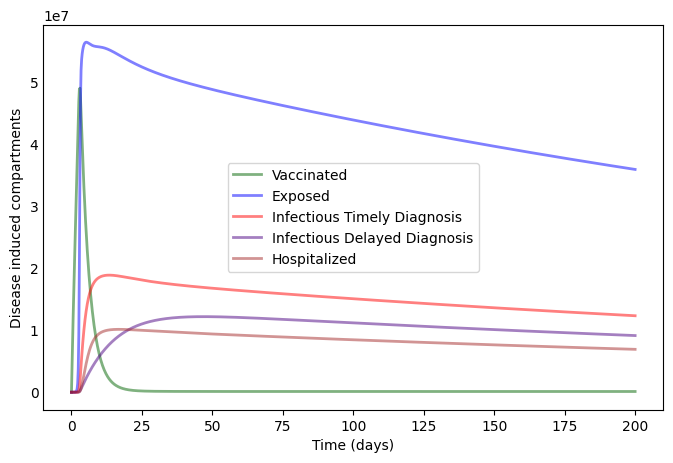

In [18]:
# Plot the data
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_facecolor('xkcd:white')

#ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Susceptible')#, linestyle='dashed')
#ax.plot(t, Sq, 'black', alpha=0.5, lw=2, label='Self-quarantine susceptible')#, linestyle='dashed')
ax.plot(t, V, 'darkgreen', alpha=0.5, lw=2, label='Vaccinated') #, linestyle='dashed'
ax.plot(t, E, 'blue', alpha=0.5, lw=2, label='Exposed') #, linestyle='dashed'
ax.plot(t, I1, 'red', alpha=0.5, lw=2, label='Infectious Timely Diagnosis')
ax.plot(t, I2, 'indigo', alpha=0.5, lw=2, label='Infectious Delayed Diagnosis')
ax.plot(t, H, 'brown', alpha=0.5, lw=2, label='Hospitalized')
#ax.plot(t, R, 'orange', alpha=0.5, lw=2, label='Recovered')#, linestyle='dashed')
#ax.plot(t, Vs, 'yellow', alpha=0.5, lw=2, label='Viral Spread')


ax.set_xlabel('Time (days)')
ax.set_ylabel('Disease induced compartments')
#ax.set_title('Graph of VSSqEI1I2VsHR Model')
ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
#ax.grid(which='major', c='black', lw=0.2, ls='-')
legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
plt.show();

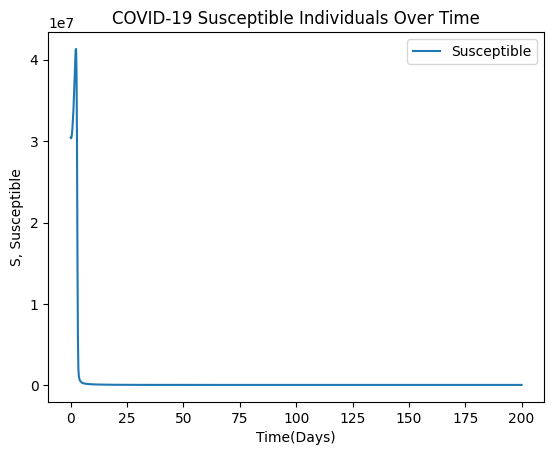

In [19]:
#susceptible individuals
plt.plot(t, S, label="Susceptible")
plt.xlabel("Time(Days)")
plt.ylabel("S, Susceptible")
plt.title("COVID-19 Susceptible Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()


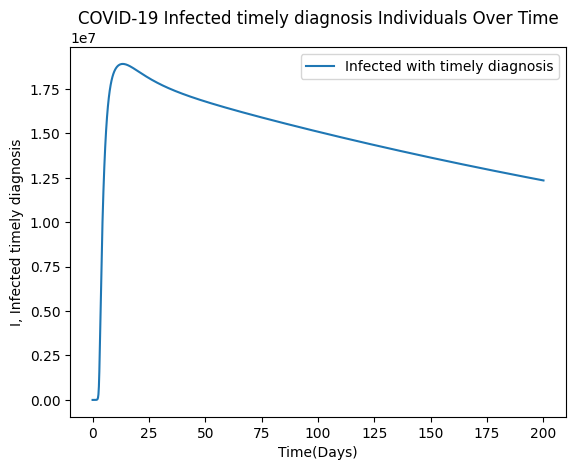

In [20]:
# infected timely diagnosis
plt.plot(t, I1, label="Infected with timely diagnosis")
plt.xlabel("Time(Days)")
plt.ylabel("I, Infected timely diagnosis")
plt.title("COVID-19 Infected timely diagnosis Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()


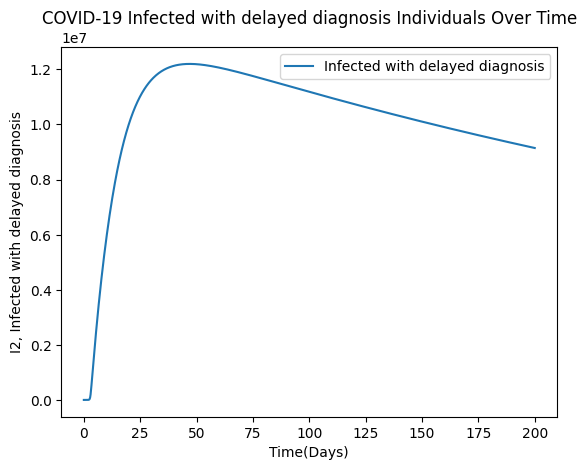

In [21]:
#infected delayed diagnosis
plt.plot(t, I2, label="Infected with delayed diagnosis")
plt.xlabel("Time(Days)")
plt.ylabel("I2, Infected with delayed diagnosis")
plt.title("COVID-19 Infected with delayed diagnosis Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()


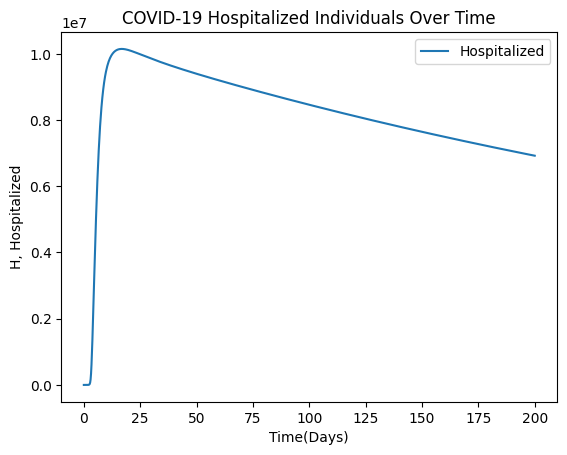

In [22]:
# hospitalized
plt.plot(t, H, label="Hospitalized")
plt.xlabel("Time(Days)")
plt.ylabel("H, Hospitalized")
plt.title("COVID-19 Hospitalized Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()

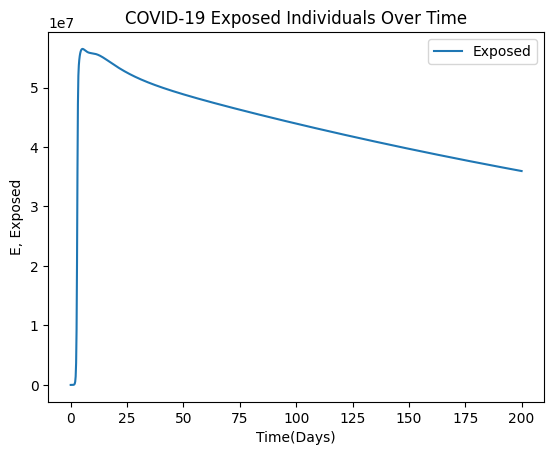

In [23]:
#exposed
plt.plot(t, E, label="Exposed")
plt.xlabel("Time(Days)")
plt.ylabel("E, Exposed")
plt.title("COVID-19 Exposed Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()

## begin Simulations

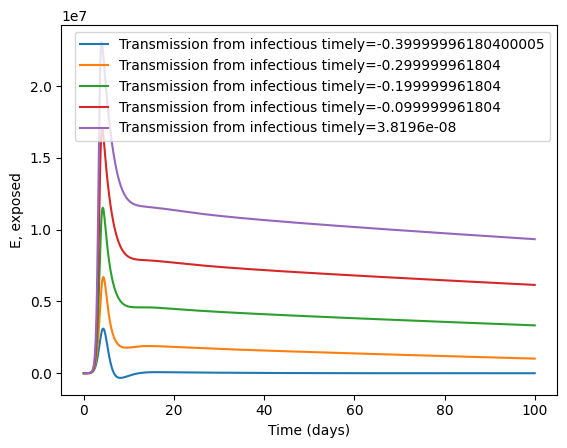

In [24]:
# Initial conditions (from the literature)

N = 30417856 #population size

S0 = 30417848 #everyone starts out as susceptible, except for initial exposed, infected and hospitalized
V0 = 0
Sq0 = 0
E0 = 2
I10 = 2
I20 = 2
H0 = 2
R0 = 0
Vs0 = 0

# A grid of time points (in days)
t = np.linspace(0, 100, 1000) #from day 0 to day 100, generate 1000 points

#parameters from literature
a=22384226/30417856
b=0.32
c=0.936
wedge=1319.294
q=0.0333
q1=1.6945e-5
beta_e=6.0380e-8
beta_i1=3.8196e-8
beta_i2=1.4286e-5
phi=0.9000
gamma_1=0.5000
gamma_2=0.0714
d=0.006139
f1=0.0178
f2=0.3115
f3=4.6131e-5
m=0.9815
beta_v=4.00199e-8
omega=1/5.2
mu=4.2578e-5
dv=0.3117

# The SEIHRV model differential equations.
def deriv(y, t, a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3):
    V, S, Sq, E, I1, I2, H, R, Vs = y

    lamda = beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*Vs
    dVdt = a*S - mu*V - b*V
    dSdt = wedge + b*V - lamda*S + q1*Sq - (mu + q)*S + c*R
    dSqdt = q*S - q1*Sq - mu*Sq
    dEdt = lamda*S - omega*E -mu*E
    dI1dt = phi*omega*E - gamma_1*I1 - mu*I1 - d*I1
    dI2dt = (1-phi)*omega*E - gamma_2*I2 - mu*I2 - d*I2
    dHdt = gamma_1 * I1 + gamma_2*I2 - m*H - mu*H - d*H
    dRdt = m*H - mu*R - c*R
    dVsdt = f1*E + f2*I1 + f3*I2 - dv*Vs

    return dVdt, dSdt, dSqdt, dEdt, dI1dt, dI2dt, dHdt, dRdt, dVsdt

# Initial conditions vector
y0 = V0, S0, Sq0, E0, I10, I20, H0, R0, Vs0

#lamda =  beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*V

# Integrate the equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3))
V, S, Sq, E, I1, I2, H, R, Vs = ret.T

# Define the different values for the wedge parameter
a_values = [beta_i1-0.4, beta_i1-0.3, beta_i1-0.2, beta_i1-0.1, beta_i1]
a_labels = [f'Transmission from infectious timely={a_val}' for a_val in a_values]

#Plot the graph for each wedge value
for a_val, label in zip(a_values, a_labels):
  ret = odeint(deriv, y0, t, args=(a_val,a, b, c, q, q1, mu, omega, beta_e, beta_i1, beta_i2, beta_v, phi, gamma_1, gamma_2, dv, m, d, f1, f2, f3))
  V, S, Sq, E, I1, I2, H, R, Vs = ret.T
  plt.plot(t, E, label=label)

#Add labels and a legend to the plot
#plt.title('Change in vaccination rate on Recovered class')
plt.xlabel('Time (days)')
plt.ylabel('E, exposed')
plt.legend()

#Display the plot
plt.show()

In [25]:
a=22384226/30417856
a

0.7358909845585435

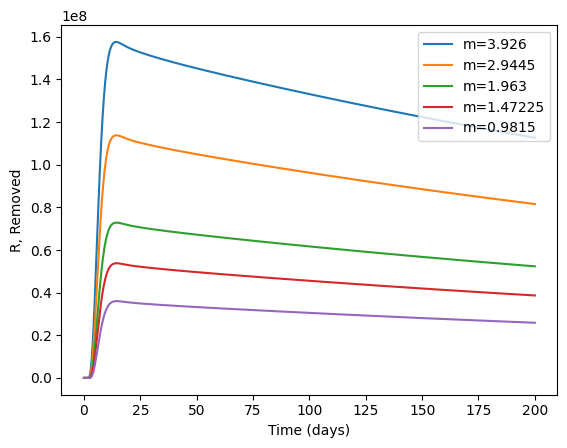

In [26]:
# Initial conditions (from the literature)

N = 30417856 #population size

S0 = 30417848 #everyone starts out as susceptible, except for initial exposed, infected and hospitalized
V0 = 0
Sq0 = 0
E0 = 2
I10 = 2
I20 = 2
H0 = 2
R0 = 0
Vs0 = 0

# A grid of time points (in days)
t = np.linspace(0, 200, 1000) #from day 0 to day 100, generate 1000 points

#parameters from literature
a=22384226/30417856
b=0.32
c=0.936
wedge=1319.294
q=0.0333
q1=1.6945e-5
beta_e=6.0380e-8
beta_i1=3.8196e-8
beta_i2=1.4286e-5
phi=0.9000
gamma_1=0.5000
gamma_2=0.0714
d=0.006139
f1=0.0178
f2=0.3115
f3=4.6131e-5
m=0.9815
beta_v=4.00199e-8
omega=1/5.2
mu=4.2578e-5
dv=0.3117

# The SEIHRV model differential equations.
def deriv(y, t, a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3):
    V, S, Sq, E, I1, I2, H, R, Vs = y

    lamda = beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*Vs
    dVdt = a*S - mu*V - b*V
    dSdt = wedge + b*V - lamda*S + q1*Sq - (mu + q)*S + c*R
    dSqdt = q*S - q1*Sq - mu*Sq
    dEdt = lamda*S - omega*E -mu*E
    dI1dt = phi*omega*E - gamma_1*I1 - mu*I1 - d*I1
    dI2dt = (1-phi)*omega*E - gamma_2*I2 - mu*I2 - d*I2
    dHdt = gamma_1 * I1 + gamma_2*I2 - m*H - mu*H - d*H
    dRdt = m*H - mu*R - c*R
    dVsdt = f1*E + f2*I1 + f3*I2 - dv*Vs

    return dVdt, dSdt, dSqdt, dEdt, dI1dt, dI2dt, dHdt, dRdt, dVsdt

# Initial conditions vector
y0 = V0, S0, Sq0, E0, I10, I20, H0, R0, Vs0

#lamda =  beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*V

# Integrate the equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3))
V, S, Sq, E, I1, I2, H, R, Vs = ret.T

# Define the different values for the wedge parameter
m_values = [m*4, m*3, m*2, m*1.5, m]
m_labels = [f'm={m_values}' for m_values in m_values]

#Plot the graph for each wedge value
for m_values, label in zip(m_values, m_labels):
  ret = odeint(deriv, y0, t, args=(m_values,a, b, c, q, q1, mu, omega, beta_e, beta_i1, beta_i2, beta_v, phi, gamma_1, gamma_2, dv, m, d, f1, f2, f3))
  V, S, Sq, E, I1, I2, H, R, Vs = ret.T
  plt.plot(t, R, label=label)

#Add labels and a legend to the plot
plt.xlabel('Time (days)')
plt.ylabel('R, Removed')
plt.legend()

#Display the plot
plt.show()

## end simulations

### Saving the result as a csv file

In [27]:
#save to csv file
Covid19_model_data = np.asarray([t,V, S, Sq, E, I1, I2, H, R, Vs])

np.savetxt("covid_data.csv", Covid19_model_data, delimiter=",")#save to csv file

# **Simulations with Neural Network parameters**

Since the neural network used min-max scaling, normalization, it is necessary to reverse this normalization to obtain meaningful parameter values

In [28]:
# unscaled_value = (scaled_value * (max_value  - min_value)) + min_value

unscaled_a = (0.5694 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_b = (0.3316 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_c = (0.6511 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_wedge = (0.2726 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_q = (0.6133 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_q1 = (0.7294 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_mu = (0.0383 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_omega = (0.4710 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_beta_e = (0.1044 *(1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_beta_i1 = (0.4950 *(1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_beta_i2 = (0.1140 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_beta_v = (0.1164 *(1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_phi = (0.1941 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_gamma_1 = (0.2238 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_gamma_2 = (0.6271 *(1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_dv = (0.6086 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_m = (0.5479 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_d = (0.1841 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_f1 = (0.2841 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_f2 = (0.5517 * (1319.294  - 3.8196e-8)) + 3.8196e-8
unscaled_f3 = (0.6142 *(1319.294  - 3.8196e-8)) + 3.8196e-8


In [29]:
unscaled_a
unscaled_b
unscaled_c
unscaled_wedge
unscaled_q
unscaled_q1
unscaled_mu
unscaled_omega
unscaled_beta_e
unscaled_beta_i1
unscaled_beta_i2
unscaled_beta_v
unscaled_phi
unscaled_gamma_1
unscaled_gamma_2
unscaled_dv
unscaled_m
unscaled_d
unscaled_f1
unscaled_f2
unscaled_f3


810.3103748147361

In [43]:
# Initial conditions (from the literature)

N = 30417856 #population size

S0 = 30417848 #everyone starts out as susceptible, except for initial exposed, infected and hospitalized
V0 = 0
Sq0 = 0
E0 = 2
I10 = 2
I20 = 2
H0 = 2
R0 = 0
Vs0 = 0

# A grid of time points (in days)
t = np.linspace(0, 300, 1000) #from day 0 to day 300, generate 1000 points

#parameters estimated from the neural network
a=0.5694
b=0.3316
c=0.6511
wedge=0.2726
q=0.6133
q1=0.7294
beta_e=0.1044
beta_i1=0.4950
beta_i2=0.1140
phi=0.1941
gamma_1=0.2238
gamma_2=0.6271
d=0.1841
f1=0.2841
f2=0.5517
f3=0.6142
m=0.5479
beta_v=0.1164
omega=0.4710
mu=0.0383
dv=0.6086

In [31]:
# The SEIHRV model differential equations.
def deriv(y, t, a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3):
    V, S, Sq, E, I1, I2, H, R, Vs = y

    lamda = beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*Vs
    dVdt = a*S - mu*V - b*V
    dSdt = wedge + b*V - lamda*S + q1*Sq - (mu + q)*S + c*R
    dSqdt = q*S - q1*Sq - mu*Sq
    dEdt = lamda*S - omega*E -mu*E
    dI1dt = phi*omega*E - gamma_1*I1 - mu*I1 - d*I1
    dI2dt = (1-phi)*omega*E - gamma_2*I2 - mu*I2 - d*I2
    dHdt = gamma_1 * I1 + gamma_2*I2 - m*H - mu*H - d*H
    dRdt = m*H - mu*R - c*R
    dVsdt = f1*E + f2*I1 + f3*I2 - dv*Vs

    return dVdt, dSdt, dSqdt, dEdt, dI1dt, dI2dt, dHdt, dRdt, dVsdt

In [32]:
# Initial conditions vector
y0 = V0, S0, Sq0, E0, I10, I20, H0, R0, Vs0

#lamda =  beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*V

# Integrate the equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3))
V, S, Sq, E, I1, I2, H, R, Vs = ret.T

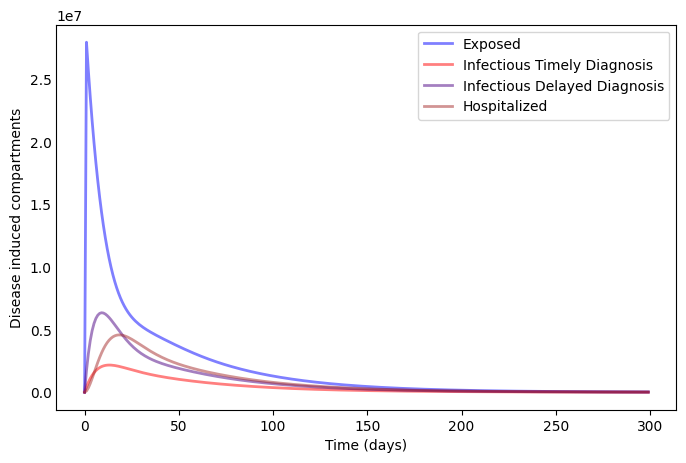

In [33]:
# Plot the data
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_facecolor('xkcd:white')

#ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Susceptible')#, linestyle='dashed')
#ax.plot(t, Sq, 'black', alpha=0.5, lw=2, label='Self-quarantine susceptible')#, linestyle='dashed')
#ax.plot(V, 'darkgreen', alpha=0.5, lw=2, label='Vaccinated') #, linestyle='dashed'
ax.plot(E, 'blue', alpha=0.5, lw=2, label='Exposed') #, linestyle='dashed'
ax.plot(I1, 'red', alpha=0.5, lw=2, label='Infectious Timely Diagnosis')
ax.plot(I2, 'indigo', alpha=0.5, lw=2, label='Infectious Delayed Diagnosis')
ax.plot(H, 'brown', alpha=0.5, lw=2, label='Hospitalized')
#ax.plot(t, R, 'orange', alpha=0.5, lw=2, label='Recovered')#, linestyle='dashed')
#ax.plot(t, Vs, 'yellow', alpha=0.5, lw=2, label='Viral Spread')


ax.set_xlabel('Time (days)')
ax.set_ylabel('Disease induced compartments')
#ax.set_title('Graph of VSSqEI1I2VsHR Model')
ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
#ax.grid(which='major', c='black', lw=0.2, ls='-')
legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
plt.show();

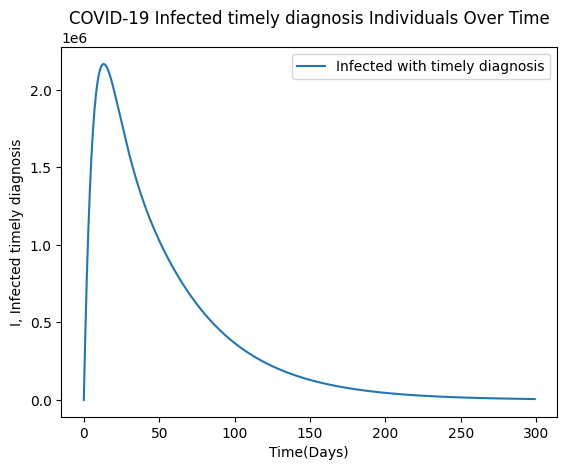

In [34]:
# infected timely diagnosis
plt.plot(I1, label="Infected with timely diagnosis")
plt.xlabel("Time(Days)")
plt.ylabel("I, Infected timely diagnosis")
plt.title("COVID-19 Infected timely diagnosis Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()


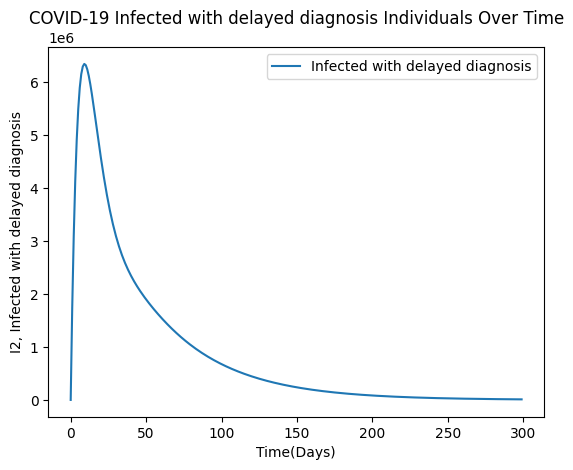

In [35]:
#infected delayed diagnosis
plt.plot(I2, label="Infected with delayed diagnosis")
plt.xlabel("Time(Days)")
plt.ylabel("I2, Infected with delayed diagnosis")
plt.title("COVID-19 Infected with delayed diagnosis Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()


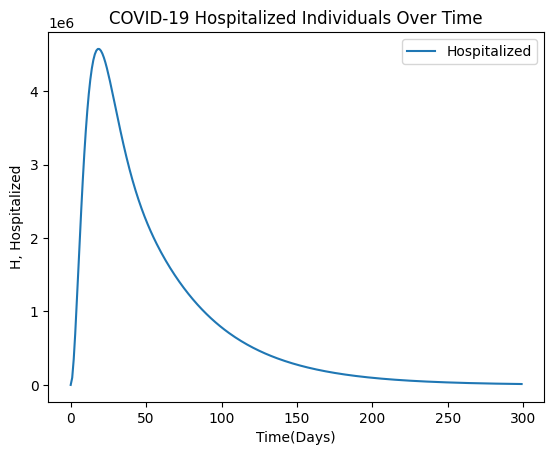

In [36]:
# hospitalized
plt.plot(H, label="Hospitalized")
plt.xlabel("Time(Days)")
plt.ylabel("H, Hospitalized")
plt.title("COVID-19 Hospitalized Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()

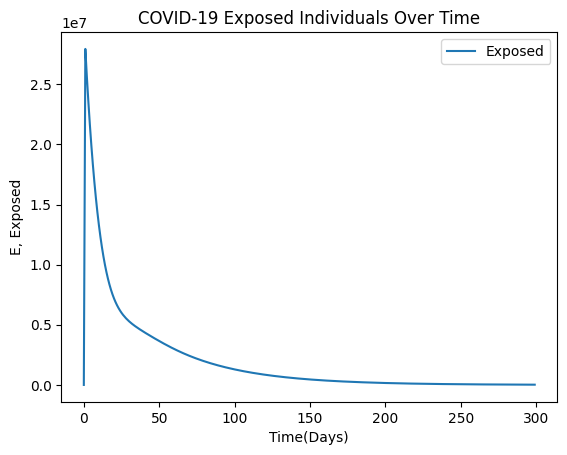

In [37]:
#exposed
plt.plot(E, label="Exposed")
plt.xlabel("Time(Days)")
plt.ylabel("E, Exposed")
plt.title("COVID-19 Exposed Individuals Over Time")
plt.legend()
#plt.grid(True)
plt.show()

Simulations

Using scaled values

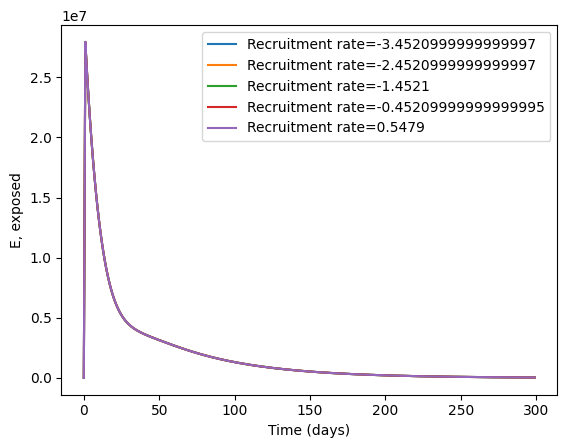

In [38]:
# Initial conditions (from the literature)

N = 30417856 #population size

S0 = 30417848 #everyone starts out as susceptible, except for initial exposed, infected and hospitalized
V0 = 0
Sq0 = 0
E0 = 2
I10 = 2
I20 = 2
H0 = 2
R0 = 0
Vs0 = 0

# A grid of time points (in days)
t = np.linspace(0, 50, 300) #from day 0 to day 100, generate 1000 points

#parameters from literature
#parameters estimated from the neural network
a=0.5694 #Total vaccinated out of total population
b=0.3316
c=0.6511
wedge=0.2726
q=0.6133
q1=0.7294
beta_e=0.1044
beta_i1=0.4950
beta_i2=0.1140
phi=0.1941
gamma_1=0.2238
gamma_2=0.6271
d=0.1841
f1=0.2841
f2=0.5517
f3=0.6142
m=0.5479
beta_v=0.1164
omega=0.4710
mu=0.0383
dv=0.6086

# The SEIHRV model differential equations.
def deriv(y, t, a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3):
    V, S, Sq, E, I1, I2, H, R, Vs = y

    lamda = beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*Vs
    dVdt = a*S - mu*V - b*V
    dSdt = wedge + b*V - lamda*S + q1*Sq - (mu + q)*S + c*R
    dSqdt = q*S - q1*Sq - mu*Sq
    dEdt = lamda*S - omega*E -mu*E
    dI1dt = phi*omega*E - gamma_1*I1 - mu*I1 - d*I1
    dI2dt = (1-phi)*omega*E - gamma_2*I2 - mu*I2 - d*I2
    dHdt = gamma_1 * I1 + gamma_2*I2 - m*H - mu*H - d*H
    dRdt = m*H - mu*R - c*R
    dVsdt = f1*E + f2*I1 + f3*I2 - dv*Vs

    return dVdt, dSdt, dSqdt, dEdt, dI1dt, dI2dt, dHdt, dRdt, dVsdt

# Initial conditions vector
y0 = V0, S0, Sq0, E0, I10, I20, H0, R0, Vs0

#lamda =  beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*V

# Integrate the equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(a,b,c,wedge,q,q1,mu,omega,beta_e,beta_i1,beta_i2,beta_v,phi,gamma_1,gamma_2,dv,m,d,f1,f2,f3))
V, S, Sq, E, I1, I2, H, R, Vs = ret.T

# Define the different values for the wedge parameter
wedge_values = [m-4, m-3, m-2, m-1, m]
wedge_labels = [f'Recruitment rate={wedge_val}' for wedge_val in wedge_values]

#Plot the graph for each wedge value
for a_val, label in zip(wedge_values, wedge_labels):
  ret = odeint(deriv, y0, t, args=(a_val,a, b, c, q, q1, mu, omega, beta_e, beta_i1, beta_i2, beta_v, phi, gamma_1, gamma_2, dv, m, d, f1, f2, f3))
  V, S, Sq, E, I1, I2, H, R, Vs = ret.T
  plt.plot(E, label=label)

#Add labels and a legend to the plot
#plt.title('Change in vaccination rate on Recovered class')
plt.xlabel('Time (days)')
plt.ylabel('E, exposed')
plt.legend()

#Display the plot
plt.show()

using unscaled values

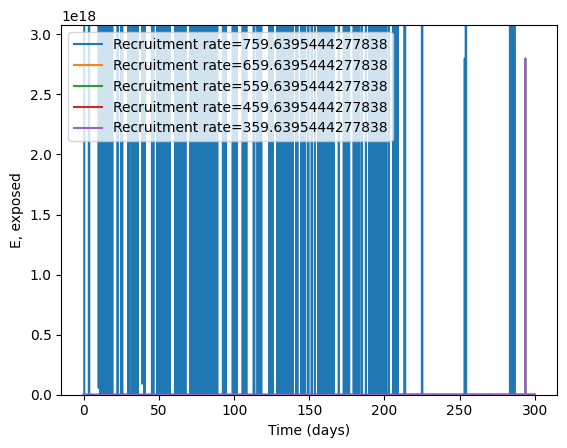

In [42]:
# Initial conditions (from the literature)

N = 30417856 #population size

S0 = 30417848 #everyone starts out as susceptible, except for initial exposed, infected and hospitalized
V0 = 0
Sq0 = 0
E0 = 2
I10 = 2
I20 = 2
H0 = 2
R0 = 0
Vs0 = 0

# A grid of time points (in days)
t = np.linspace(0, 300, 1000) #from day 0 to day 300, generate 1000 points


#parameters estimated from the neural network
unscaled_a
unscaled_b
unscaled_c
unscaled_wedge
unscaled_q
unscaled_q1
unscaled_mu
unscaled_omega
unscaled_beta_e
unscaled_beta_i1
unscaled_beta_i2
unscaled_beta_v
unscaled_phi
unscaled_gamma_1
unscaled_gamma_2
unscaled_dv
unscaled_m
unscaled_d
unscaled_f1
unscaled_f2
unscaled_f3


# The SEIHRV model differential equations.
def deriv(y, t, unscaled_a,unscaled_b,unscaled_c,unscaled_wedge,unscaled_q,unscaled_q1,unscaled_mu,unscaled_omega,unscaled_beta_e,unscaled_beta_i1,
          unscaled_beta_i2,unscaled_beta_v,unscaled_phi,unscaled_gamma_1,unscaled_gamma_2,unscaled_dv,unscaled_m,unscaled_d,
          unscaled_f1,unscaled_f2,unscaled_f3):
    V, S, Sq, E, I1, I2, H, R, Vs = y

    lamda = unscaled_beta_e*E + unscaled_beta_i1*I1 + unscaled_beta_i2*I2 + unscaled_beta_v*Vs
    dVdt = unscaled_a*S - unscaled_mu*V - unscaled_b*V
    dSdt = unscaled_wedge + unscaled_b*V - lamda*S + q1*Sq - (unscaled_mu + unscaled_q)*S + unscaled_c*R
    dSqdt = unscaled_q*S - unscaled_q1*Sq - unscaled_mu*Sq
    dEdt = lamda*S - unscaled_omega*E - unscaled_mu*E
    dI1dt = unscaled_phi*unscaled_omega*E - unscaled_gamma_1*I1 - unscaled_mu*I1 - unscaled_d*I1
    dI2dt = (1-unscaled_phi)*unscaled_omega*E - unscaled_gamma_2*I2 - unscaled_mu*I2 - unscaled_d*I2
    dHdt = unscaled_gamma_1*I1 + unscaled_gamma_2*I2 - unscaled_m*H - unscaled_mu*H - unscaled_d*H
    dRdt = unscaled_m*H - unscaled_mu*R - unscaled_c*R
    dVsdt = unscaled_f1*E + unscaled_f2*I1 + unscaled_f3*I2 - unscaled_dv*Vs

    return dVdt, dSdt, dSqdt, dEdt, dI1dt, dI2dt, dHdt, dRdt, dVsdt

# Initial conditions vector
y0 = V0, S0, Sq0, E0, I10, I20, H0, R0, Vs0

#lamda =  beta_e*E + beta_i1*I1 + beta_i2*I2 + beta_v*V

# Integrate the equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(unscaled_a,unscaled_b,unscaled_c,unscaled_wedge,unscaled_q,unscaled_q1,unscaled_mu,unscaled_omega,unscaled_beta_e,unscaled_beta_i1,
          unscaled_beta_i2,unscaled_beta_v,unscaled_phi,unscaled_gamma_1,unscaled_gamma_2,unscaled_dv,unscaled_m,unscaled_d,
          unscaled_f1,unscaled_f2,unscaled_f3))
V, S, Sq, E, I1, I2, H, R, Vs = ret.T

# Define the different values for the wedge parameter
wedge_values = [unscaled_wedge+400, unscaled_wedge+300, unscaled_wedge+200, unscaled_wedge+100, unscaled_wedge]
wedge_labels = [f'Recruitment rate={wedge_val}' for wedge_val in wedge_values]

fig, ax = plt.subplots()

# Plot the graph for each wedge value
for a_val, label in zip(wedge_values, wedge_labels):
    ret = odeint(deriv, y0, t, args=(a_val,unscaled_a,unscaled_b,unscaled_c,unscaled_q,unscaled_q1,unscaled_mu,unscaled_omega,unscaled_beta_e,
          unscaled_beta_i1,unscaled_beta_i2,unscaled_beta_v,unscaled_phi,unscaled_gamma_1,unscaled_gamma_2,unscaled_dv,unscaled_m,unscaled_d,
          unscaled_f1,unscaled_f2,unscaled_f3))
    V, S, Sq, E, I1, I2, H, R, Vs = ret.T
    ax.plot(t, E, label=label)

# Set the y-axis limits
ax.set_ylim(0, max(E) * 1.1)  # Set the upper limit as 10% higher than the maximum E value

ax.set_xlabel('Time (days)')
ax.set_ylabel('E, exposed')
ax.legend()
plt.show()


Using unscaled Neural network paran values

# <h1 style='text-align: center;'> The End </h1>
# <h1 style='text-align: center;'> Thank You </h1>